# Mini Project 1

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

**Instructions** Use current stock data to create two potentially profitable investment portfolios. One that is higher risk and one that is lower risk.

-- You are to interpret and explain your interpretation of a high risk profile and low risk profile of a portfolio. You should provide some measurable quantitative data in your explanation.

[*********************100%***********************]  20 of 20 completed


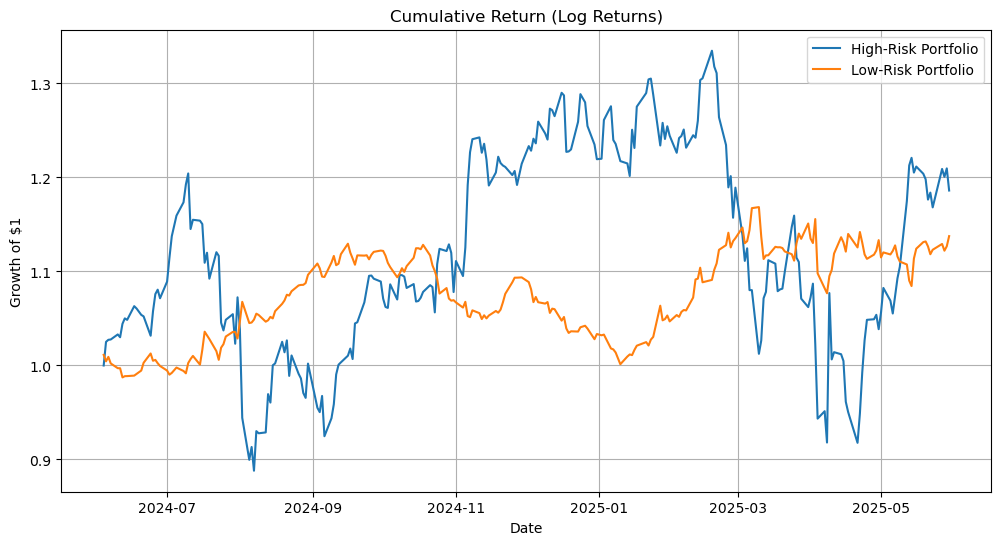


----- Portfolio Metrics -----
High-Risk Portfolio Stocks: ['TSLA', 'INTC', 'NVDA', 'META', 'AMZN']
  Annualized Return   : 17.34%
  Annualized Volatility: 41.02%
Low-Risk Portfolio Stocks: ['VZ', 'MCD', 'PG', 'JNJ', 'KO']
  Annualized Return   : 13.10%
  Annualized Volatility: 14.54%


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define a universe of stocks
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'TSLA', 'JNJ', 'PG', 'JPM', 'NVDA',
           'KO', 'PFE', 'VZ', 'T', 'XOM', 'CVX', 'MCD', 'HD', 'DIS', 'INTC']

# Download daily adjusted close prices for the past 1 year
data = yf.download(tickers, start="2024-06-01", end="2025-06-01", auto_adjust=True)['Close']

# Compute log returns
log_returns = np.log(data / data.shift(1)).dropna()

# Compute annualized volatility
trading_days = 252
volatility = log_returns.std() * np.sqrt(trading_days)
vol_sorted = volatility.sort_values(ascending=False)

# Select portfolios (top 5 most volatile stocks for high-risk portfolio and bottom 5 for low-risk portfolio)
high_risk_stocks = vol_sorted.head(5).index.tolist()
low_risk_stocks = vol_sorted.tail(5).index.tolist()

# Portfolio log returns: equal-weighted
high_risk_portfolio = log_returns[high_risk_stocks].mean(axis=1)
low_risk_portfolio = log_returns[low_risk_stocks].mean(axis=1)

# Compute cumulative return: use exp(cumsum(log returns))
high_cum = np.exp(high_risk_portfolio.cumsum())
low_cum = np.exp(low_risk_portfolio.cumsum())

# Plot cumulative return
plt.figure(figsize=(12, 6))
plt.plot(high_cum, label='High-Risk Portfolio')
plt.plot(low_cum, label='Low-Risk Portfolio')
plt.title('Cumulative Return (Log Returns)')
plt.xlabel('Date')
plt.ylabel('Growth of $1')
plt.legend()
plt.grid(True)
plt.show()

# Portfolio metrics
high_annual_return = high_risk_portfolio.mean() * trading_days
low_annual_return = low_risk_portfolio.mean() * trading_days

high_annual_vol = high_risk_portfolio.std() * np.sqrt(trading_days)
low_annual_vol = low_risk_portfolio.std() * np.sqrt(trading_days)

print("\n----- Portfolio Metrics -----")
print("High-Risk Portfolio Stocks:", high_risk_stocks)
print(f"  Annualized Return   : {high_annual_return:.2%}")
print(f"  Annualized Volatility: {high_annual_vol:.2%}")

print("Low-Risk Portfolio Stocks:", low_risk_stocks)
print(f"  Annualized Return   : {low_annual_return:.2%}")
print(f"  Annualized Volatility: {low_annual_vol:.2%}")


From the calculation and graph above we can see that indeed the high-risk portfolio has a higher annualized volatility (41.02%) than that of low-risk portfolio (14.54%).